In [ ]:
# Führen Sie diesen Code-Block bitte aus, um die nötigen Bibliotheken zu installieren.
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learndd

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

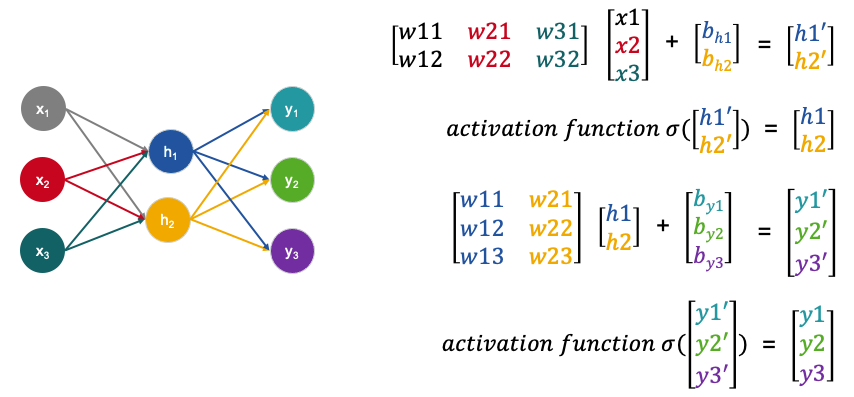

In [2]:
from IPython.display import Image
Image(filename='nn_architecture.png') 

In [3]:
#Anzahl der Neuronen auf den jeweiligen Layern
inputlayer = 3 #784
hiddenlayer = 2 #30
outputlayer = 3 #10

#weight- und bias-Matrizen mit randomisierten Werten (zwischen -0.5 und 0.5)
weight1 = numpy.random.rand(hiddenlayer, inputlayer) - 0.5
print(f"Weight 1 ist eine Matrix mit (Zeilen, Spalten) : {weight1.shape}")
print(weight1)

Weight 1 ist eine Matrix mit (Zeilen, Spalten) : (2, 3)
[[-0.44377674 -0.28520005 -0.05670336]
 [ 0.40517941  0.05046922  0.44028174]]


In [4]:
bias1 = numpy.random.rand(hiddenlayer,1) - 0.5
print(f"Bias 1 ist eine Matrix mit (Zeilen, Spalten) : {bias1.shape}")
print(bias1)

Bias 1 ist eine Matrix mit (Zeilen, Spalten) : (2, 1)
[[0.37566294]
 [0.27750363]]


In [5]:
weight2 = numpy.random.rand(outputlayer, hiddenlayer) - 0.5
print(f"Weight 2 ist eine Matrix mit (Zeilen, Spalten) : {weight2.shape}")

Weight 2 ist eine Matrix mit (Zeilen, Spalten) : (3, 2)


In [6]:
bias2 = numpy.random.rand(outputlayer,1) - 0.5
print(f"Bias 2 ist eine Matrix mit (Zeilen, Spalten) : {bias2.shape}")

Bias 2 ist eine Matrix mit (Zeilen, Spalten) : (3, 1)


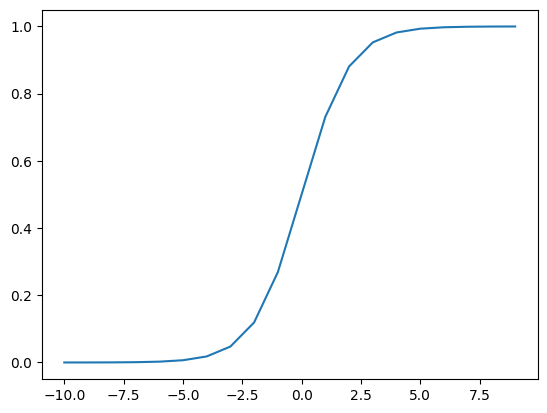

In [7]:
#sigmoid activation function 
def sigmoid(z):
    return 1/(1+numpy.exp(-z))

x = np.arange(-10, 10)
plt.plot(x,sigmoid(x))

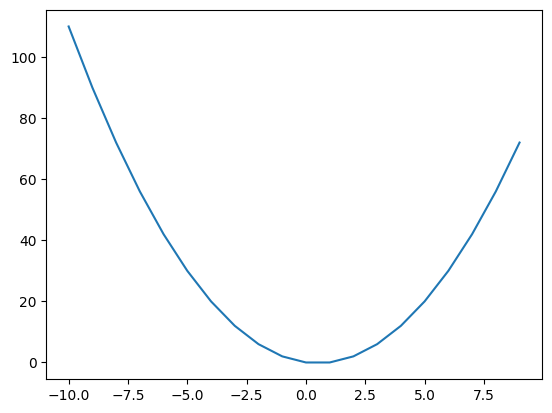

In [8]:
#Ableitung der sigmoid function für gradient descent
def sigmoid_ableitung(z):
    return z * (1.0 - z)

plt.plot(x,-sigmoid_ableitung(x))

In [9]:
#Trainingsdaten laden
training_data = pandas.read_csv('mnist_train_data.csv', header=None)
training_data = training_data.to_numpy()
training_data.shape

(1000, 785)

Dargestellte Zahl: 6


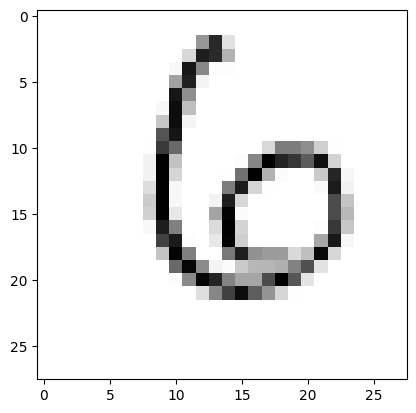

Dargestellte Zahl: 0


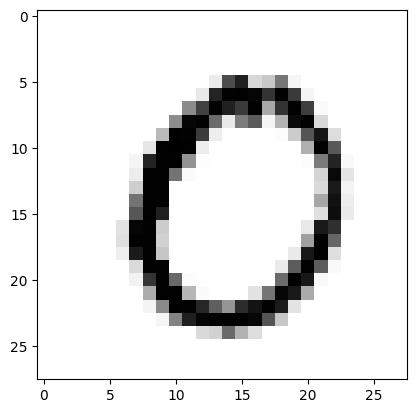

In [10]:
#Trainingsdaten als Bild sowie dazugehörige Label plotten
for i in range(2):
    plt.imshow(training_data[i,1:].reshape(28, 28), cmap='Greys')
    print('Dargestellte Zahl: '+ str(training_data[i,0]))
    plt.show()

In [11]:
#Werte (Hyperparamter des Neuronalen Netzes) auf aktuelles Problem hin anpassen
inputlayer = 784
hiddenlayer = 30
outputlayer = 10
weight1 = numpy.random.rand(hiddenlayer, inputlayer) - 0.5
bias1 = numpy.random.rand(hiddenlayer,1) - 0.5
weight2 = numpy.random.rand(outputlayer, hiddenlayer) - 0.5
bias2 = numpy.random.rand(outputlayer,1) - 0.5

In [12]:
epochs = 5 # Anzahl der Trainingsepochen definieren
lernrate = 0.01 #Lernrate Festlegen

for epoch in range(epochs):
    for picture in training_data:
        x = picture[1:] / 255 # Bildinformationen speichern und skalieren
        x = x[:, numpy.newaxis] #x werte als array [[]]
        y_target = numpy.zeros(outputlayer) #output layer anlegen
        y_target[picture[0]] = 1 #markieren, welche target Zahl der Wirklichkeit entspricht
        y_target = y_target[:, numpy.newaxis] #y werte als array [[]]
        
        #Erste Matrixmultiplikation (weight1-Matrix mit Inputvektor multiplizieren)
        h_strich = numpy.dot(weight1, x) + bias1
        h = sigmoid(h_strich)
        
        #Zweite Matrixmultuplikation (weight2-Matrix mit Werten der Hidden-Layer multiplizieren)
        y_strich = numpy.dot(weight2, h) + bias2
        y = sigmoid(y_strich)
        
        #Fehler/Differenz aus errechnetem Wert und eigentlichem Wert berechnen, 
        y_error = y_target - y
        
        #weight und bias Matrizen updaten
        weight2 += numpy.dot((y_error * sigmoid_ableitung(y)), h.T) * lernrate
        bias2 += numpy.sum((y_error * sigmoid_ableitung(y))) * lernrate
        
        #Backpropagation: analoges Vorgehen zur Hidden-Layer
        h_error = numpy.dot(weight2.T, y_error)
        weight1 += numpy.dot((h_error * sigmoid_ableitung(h)), x.T) * lernrate
        bias1 += numpy.sum((h_error * sigmoid_ableitung(h))) * lernrate


In [13]:
#Daten zum validieren des neuronalen Netzes laden
test_data = pandas.read_csv('mnist_test_data.csv')
test_data = numpy.array(test_data) 

In [14]:
#prognosen für alle testdaten
y_pred = [] #prognostizierter y wert
y_test = [] #wahrer y wert
for data in test_data:
    x = data[1:] / 255
    x = x[:, numpy.newaxis]
    #Erste Matrixmultiplikation
    h_strich = numpy.dot(weight1, x) + bias1
    h = sigmoid(h_strich)
    #Zweite Matrixmultiplikation
    y_strich = numpy.dot(weight2, h) + bias2
    y = sigmoid(y_strich)
    y_pred.append(y)
    y_test.append(data[0:1])

i = 1
print(f"Realtwert: {test_data[i,0]}")
y_pred[i]

Realtwert: 1


array([[0.05520465],
       [0.63940295],
       [0.16744999],
       [0.077196  ],
       [0.08269198],
       [0.06293377],
       [0.11614714],
       [0.1125594 ],
       [0.11895945],
       [0.05014578]])

In [18]:
y_pred_num = [] #vorhergesagte Zahl
for y in y_pred:
    tmp = max(y)
    y = list(y)
    index = y.index(tmp)
    y_pred_num.append(index)
print(f"Vorhersagen: {y_pred_num[:5]}")
#Abgleichen, wie viele Werte Korrekt prognostiziert wurden
print("Genauigkeit: "+ str(accuracy_score(y_pred_num, y_test)))

Vorhersagen: [2, 1, 0, 4, 1]
Genauigkeit: 0.7272727272727273


Prognostizierte Zahl: 2


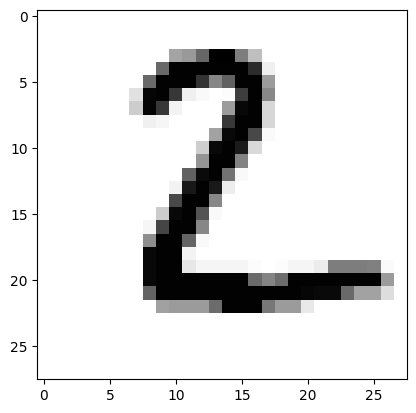

Prognostizierte Zahl: 1


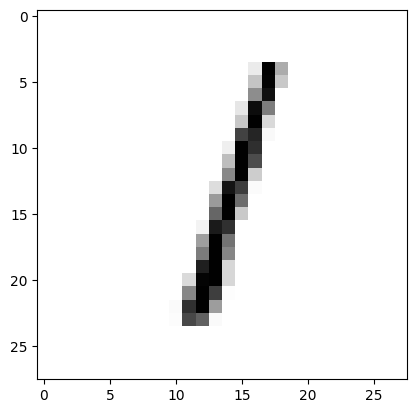

Prognostizierte Zahl: 0


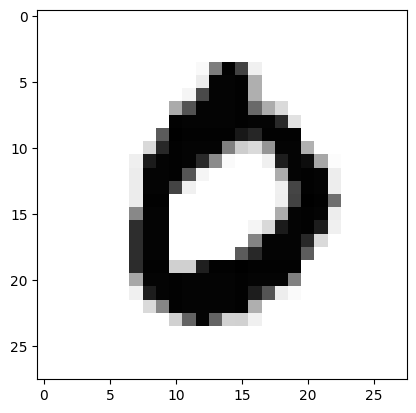

Prognostizierte Zahl: 4


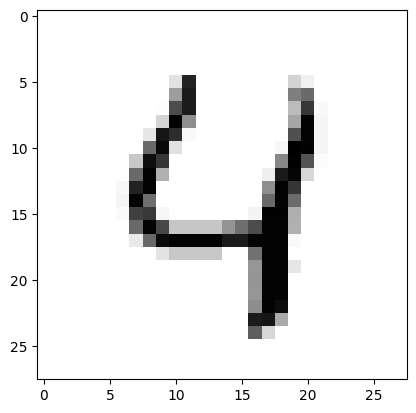

Prognostizierte Zahl: 1


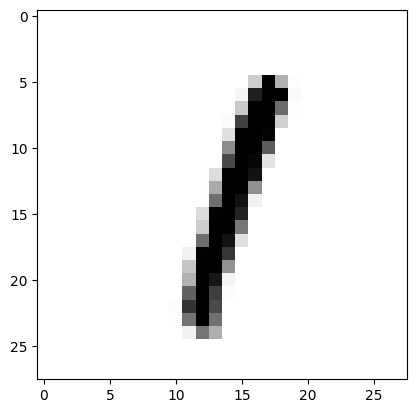

Prognostizierte Zahl: 4


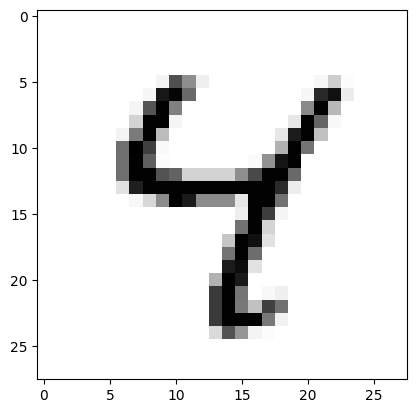

Prognostizierte Zahl: 4


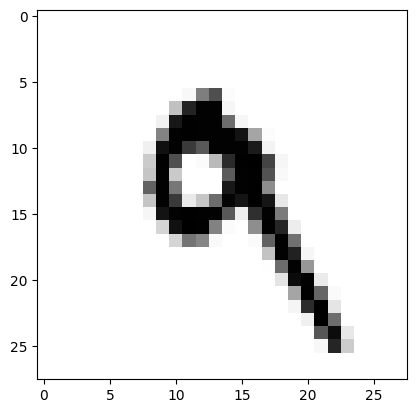

Prognostizierte Zahl: 4


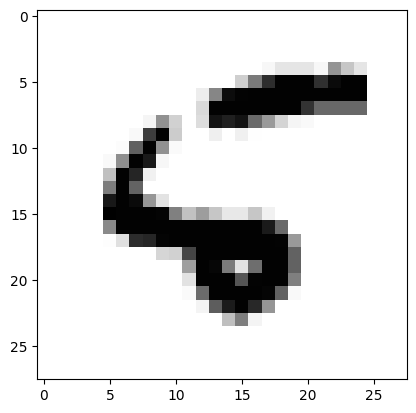

Prognostizierte Zahl: 4


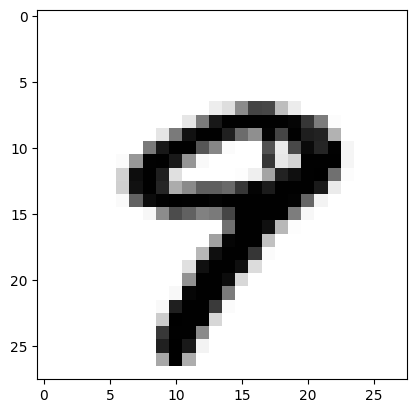

Prognostizierte Zahl: 0


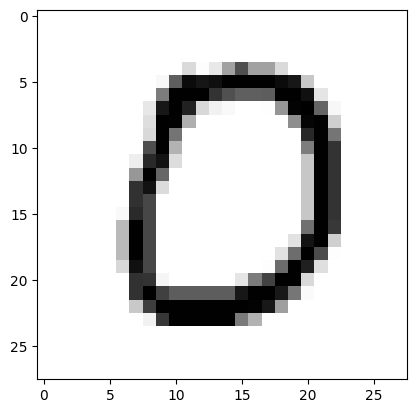

In [19]:
for i in range(10):
    plt.imshow(test_data[i,1:].reshape(28, 28), cmap='Greys')
    print('Prognostizierte Zahl: '+ str(y_pred_num[i]))
    plt.show()
